By : PRITHVI DEV

Data Science And Business Analytics Internship

GRIP The Spark Foundation
###GRIPJAN21
Task-6

To Explore Decision Tree Algorithm


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
d={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}

In [ ]:
df['Species']=df['Species'].map(d)

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


**Data Analysis and Training Data¶**


In [ ]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn import tree
dtree=tree.DecisionTreeClassifier(random_state=42)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('Confusion Matrix ',confusion_matrix(y_test,pred))
print('Accuracy Score ' ,accuracy_score(y_test,pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


1.0

[Text(257.53846153846155, 504.7714285714286, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(193.15384615384616, 427.11428571428576, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(321.9230769230769, 427.11428571428576, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(128.76923076923077, 349.4571428571429, 'X[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(64.38461538461539, 271.8, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(193.15384615384616, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(515.0769230769231, 349.4571428571429, 'X[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(321.9230769230769, 271.8, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(257.53846153846155, 194.14285714285717, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(386.3076923076923, 194.14285714285717, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321

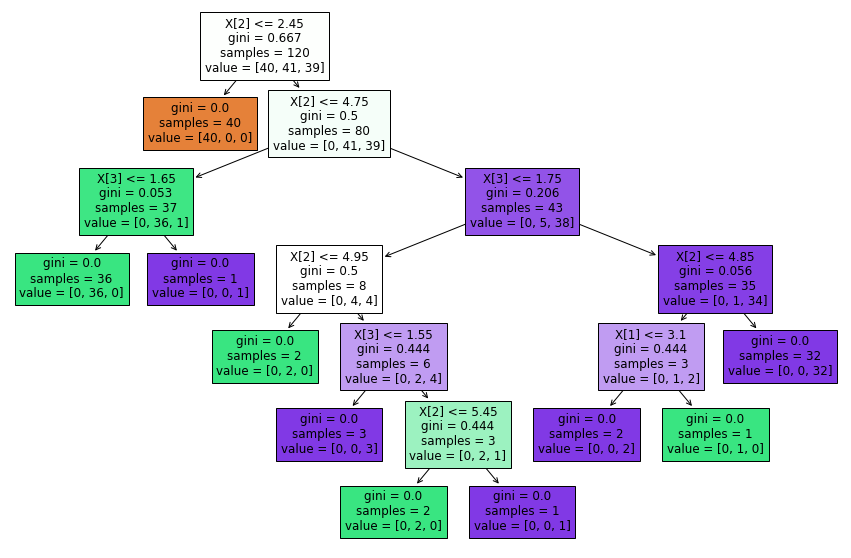

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True)

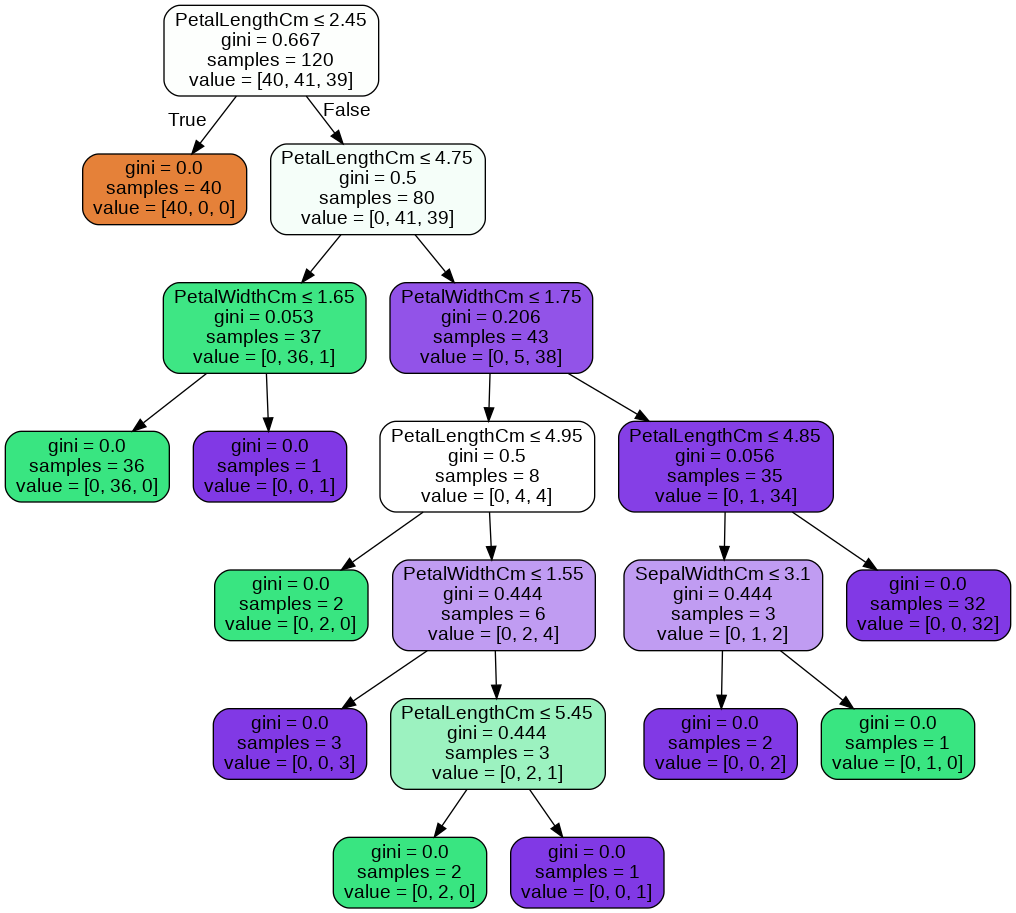

In [ ]:
from io import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=x.columns)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Subcategory.png')
Image(graph.create_png())